# ANN

Test the ANN algorithm from *K. P. Amber, R. Ah-mad, M. W. Aslam, A. Kousar, M. Usman, and M. S. Khan*. 

In [5]:
import warnings
import pickle

warnings.filterwarnings("ignore")


# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import tensorflow libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Activation,
    Flatten,
    Conv2D,
    MaxPooling2D,
)
from tensorflow.keras.callbacks import TensorBoard

# import sklearn libraries for regression performance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [9]:
def pre_processing(df: pd.DataFrame, X_columns, y_columns, random=True, test_size=0.2, normalize=True):
    """Pre-processing function

    This function takes a dataframe and splits it into X and y.
    It also splits the data into train and test.

    Args:
        df: pandas dataframe
        X_columns: list of columns to be used as X
        y_columns: list of columns to be used as y
        random: boolean, if True, randomize the dataframe
        test_size: float, the size of the test set

    Returns:
        X_train: numpy array of X_train
        X_test: numpy array of X_test
        y_train: numpy array of y_train
        y_test: numpy array of y_test
        scaler: sklearn scaler object if normalize is True
    """
    X = df[X_columns]
    y = df[y_columns]

    if normalize:
        scaler = StandardScaler()
        X, y = scaler.fit_transform(X), scaler.fit_transform(y)

    if random:
        # split into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
    else:
        # get first train size of data as train
        X_train = X.iloc[: int(X.shape[0] * (1 - test_size))]
        y_train = y.iloc[: int(y.shape[0] * (1 - test_size))]
        # get remaining data as test
        X_test = X.iloc[int(X.shape[0] * (1 - test_size)) :]
        y_test = y.iloc[int(y.shape[0] * (1 - test_size)) :]

    if not normalize:
        return X_train, X_test, y_train, y_test
    return X_train, X_test, y_train, y_test, scaler

    
def build_ann(X) -> Sequential:
    """
    Build an Artificial Neural Network

    Args:
        X: numpy array of X

    Returns:
        model: keras model
    """
    model = Sequential()
    model.add(Dense(units=64, activation="relu", input_dim=X.shape[1]))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model


In [15]:
df4: pd.DataFrame = pd.read_pickle("df4.pkl")

X = df4.columns.difference(["energy"])
y = ["energy"]

X_train, X_test, y_train, y_test, scaler = pre_processing(df4, X, y)


In [16]:
model = build_ann(X_train)


In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


2022-03-18 15:23:05.680617: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 669129760 exceeds 10% of free system memory.


Epoch 1/10
100530/100531 [============================>.] - ETA: 0s - loss: 0.0288 - mae: 0.0685

2022-03-18 15:25:47.330765: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 167282544 exceeds 10% of free system memory.


100531/100531 [==============================] - 180s 2ms/step - loss: 0.0288 - mae: 0.0685 - val_loss: 0.0259 - val_mae: 0.0609
Epoch 2/10
100531/100531 [==============================] - 157s 2ms/step - loss: 0.0265 - mae: 0.0648 - val_loss: 0.0254 - val_mae: 0.0622
Epoch 3/10
100531/100531 [==============================] - 166s 2ms/step - loss: 0.0260 - mae: 0.0642 - val_loss: 0.0266 - val_mae: 0.0648
Epoch 4/10
100531/100531 [==============================] - 172s 2ms/step - loss: 0.0258 - mae: 0.0639 - val_loss: 0.0250 - val_mae: 0.0604
Epoch 5/10
100531/100531 [==============================] - 168s 2ms/step - loss: 0.0256 - mae: 0.0637 - val_loss: 0.0250 - val_mae: 0.0632
Epoch 6/10
100531/100531 [==============================] - 172s 2ms/step - loss: 0.0255 - mae: 0.0635 - val_loss: 0.0255 - val_mae: 0.0597
Epoch 7/10
100531/100531 [==============================] - 187s 2ms/step - loss: 0.0255 - mae: 0.0634 - val_loss: 0.0259 - val_mae: 0.0637
Epoch 8/10
100531/100531 [=====

In [18]:
model.evaluate(X_test, y_test)

31416/31416 [==============================] - 34s 1ms/step - loss: 0.0245 - mae: 0.0616


[0.024464990943670273, 0.06160784885287285]

In [31]:
# make predictions
predictions = model.predict(X_test)


In [32]:
# scale back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_back = scaler.inverse_transform(y_test)


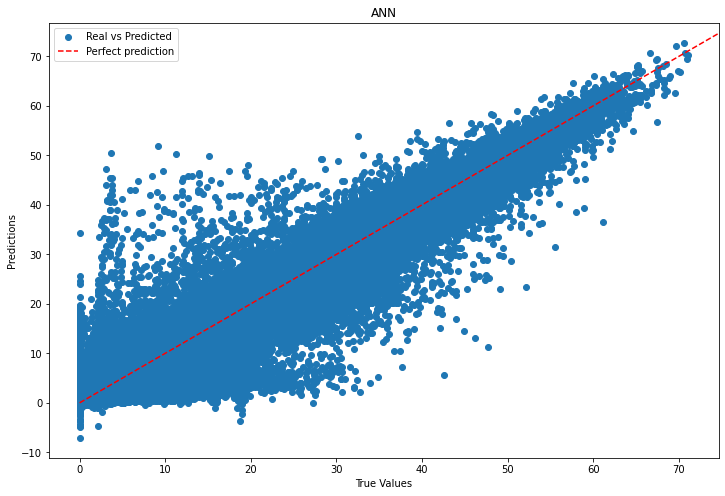

In [36]:
# plot the results
plt.figure(figsize=(12, 8))

plt.scatter(y_test_back, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("ANN")
plt.xlim(plt.xlim()[0], plt.xlim()[1])
plt.ylim(plt.ylim()[0], plt.ylim()[1])
_ = plt.plot([0, 100], [0, 100], "--r")
plt.legend(["Real vs Predicted", "Perfect prediction"])
plt.show()


In [35]:
# calculate the error
mse = mean_squared_error(y_test_back, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_back, predictions)
r2 = r2_score(y_test_back, predictions)

print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)


MSE: 1.7888
RMSE: 1.3375
MAE: 0.5268
R2: 0.9755
